In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import tree
from sklearn import datasets
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


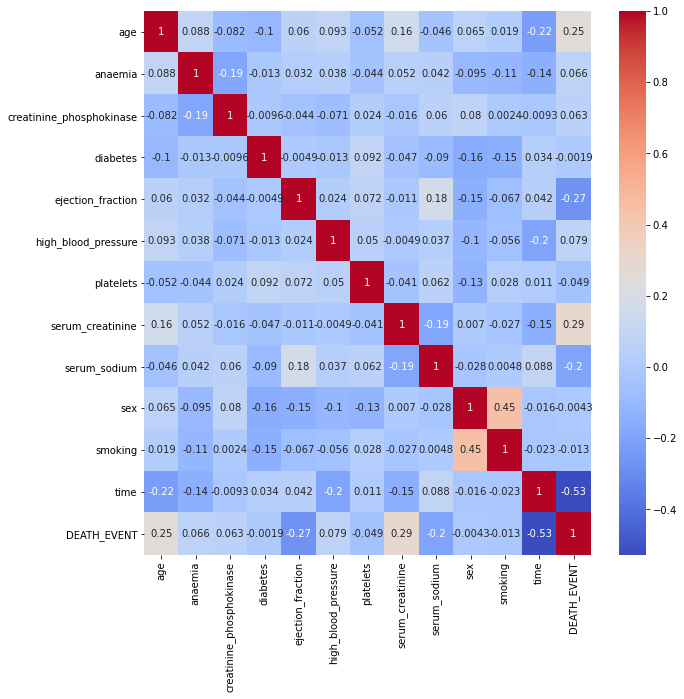

In [4]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='coolwarm', annot=True)

In [5]:
X=df.drop(['DEATH_EVENT'], axis=1)
y=df['DEATH_EVENT']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
def print_validation_report(y_true, y_pred):
    print("Classification Report")
    print(classification_report(y_true, y_pred))
    acc_sc = accuracy_score(y_true, y_pred)
    print("Accuracy : "+ str(acc_sc))

In [8]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  
                cmap="Blues", cbar=False)
    plt.ylabel('true label')
    plt.xlabel('predicted label')

In [9]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

Linear Regression Accuracy : 73.33333333333333 %


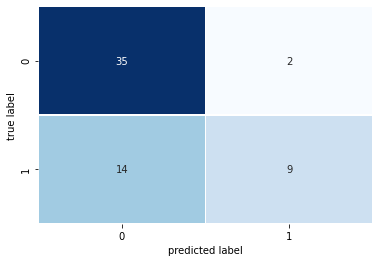

In [10]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(max_iter=10000)
lr.fit(X_train,y_train)
p1=lr.predict(X_test)
s1=accuracy_score(y_test,p1)
print("Linear Regression Accuracy :", s1*100,'%')
plot_confusion_matrix(y_test,p1)

Random Forrest Accuracy : 85.0 %


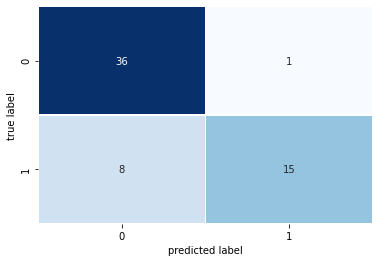

In [11]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
p2=rfc.predict(X_test)
s2=accuracy_score(y_test,p2)
print("Random Forrest Accuracy :", s2*100,'%')
plot_confusion_matrix(y_test,p2)

KNN Accuracy : 58.333333333333336 %


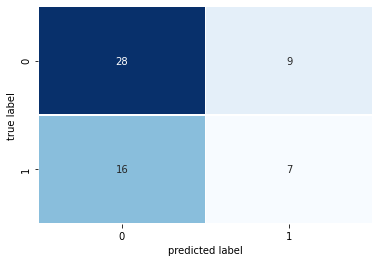

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
p4=knn.predict(X_test)
s4=accuracy_score(y_test,p4)
print("KNN Accuracy :", s4*100,'%')
plot_confusion_matrix(y_test,p4)

Naive-Bayes Accuracy: 76.66666666666667 %


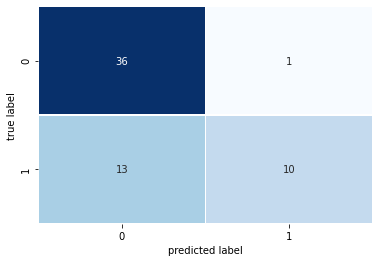

In [13]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
p5 =nb.predict(X_test)
s5=accuracy_score(y_test,p5)
print("Naive-Bayes Accuracy:", s5*100,'%')
plot_confusion_matrix(y_test,p5)

DecsionTree Accuracy: 73.33333333333333 %


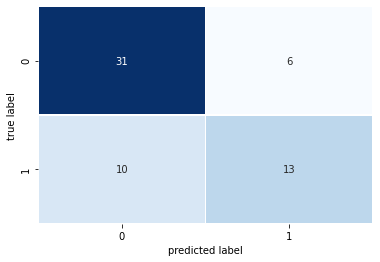

In [14]:
from sklearn.tree import DecisionTreeClassifier
tr = tree.DecisionTreeClassifier()
tr.fit(X_train, y_train)
p7 =tr.predict(X_test)
s7=accuracy_score(y_test,p7)
print("DecsionTree Accuracy:", s7*100,'%')
plot_confusion_matrix(y_test,p7)

In [15]:
f1=f1_score(y_test,p1)
f2=f1_score(y_test,p2)
f4=f1_score(y_test,p4)
f5=f1_score(y_test,p5)
f7=f1_score(y_test,p7)

In [16]:
models = pd.DataFrame({
    'Model': ["LOGISTIC REGRESSION","RANDOM FOREST","KNN","NAIVE-BAYES","DecsionTree"],
    'Accuracy Score': [s1*100,s2*100,s4*100,s5*100,s7*100],
    'f1_score': [f1*100,f2*100,f4*100,f5*100,f7*100]})
models.sort_values(by='Accuracy Score', ascending=False)
models.sort_values(by='f1_score', ascending=False)

,Model,Accuracy Score,f1_score
1,RANDOM FOREST,85.000000,76.923077
4,DecsionTree,73.333333,61.904762
3,NAIVE-BAYES,76.666667,58.823529
0,LOGISTIC REGRESSION,73.333333,52.941176
2,KNN,58.333333,35.897436


In [17]:
from sklearn.metrics import roc_curve,roc_auc_score, auc

In [18]:
fpr1,tpr1, thr1=roc_curve(y_test,p1)
fpr2,tpr2, thr2=roc_curve(y_test,p2)
fpr4,tpr4, thr4=roc_curve(y_test,p4)
fpr5,tpr5, thr5=roc_curve(y_test,p5)
fpr7,tpr7, thr7=roc_curve(y_test,p7)

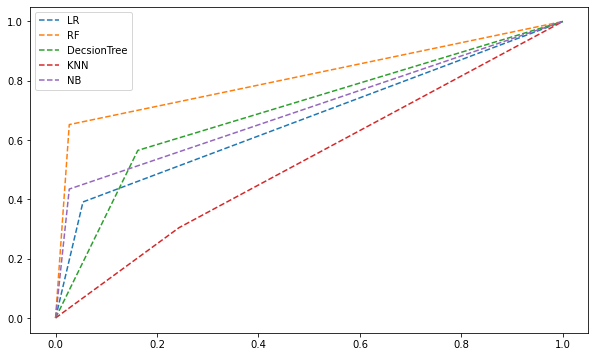

In [19]:
plt.figure(figsize=(10,6))
plt.plot(fpr1,tpr1, linestyle='--', label='LR')
plt.plot(fpr2,tpr2, linestyle='--', label='RF')
plt.plot(fpr7,tpr7, linestyle='--', label='DecsionTree')
plt.plot(fpr4,tpr4, linestyle='--', label='KNN')
plt.plot(fpr5,tpr5, linestyle='--', label='NB')
plt.legend()

In [20]:
print("LR:",roc_auc_score(y_test,p1))
print("RF:",roc_auc_score(y_test,p2))
print("DecsionTree:",roc_auc_score(y_test,p7))
print("KNN:",roc_auc_score(y_test,p4))
print("NB:",roc_auc_score(y_test,p5))

LR: 0.6686251468860165
RF: 0.8125734430082258
DecsionTree: 0.7015276145710928
KNN: 0.5305522914218567
NB: 0.7038777908343126


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import eli5
from eli5.sklearn import PermutationImportance


  

model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)


eli5.show_weights(perm, feature_names=X_test.columns.tolist())

C:\Users\a0952\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\a0952\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.2000 ± 0.1095,time
0.0333 ± 0.0211,ejection_fraction
0.0100 ± 0.0267,serum_sodium
0.0100 ± 0.0340,serum_creatinine
0.0067 ± 0.0163,high_blood_pressure
0.0067 ± 0.0163,creatinine_phosphokinase
0.0033 ± 0.0133,platelets
0 ± 0.0000,smoking
0 ± 0.0000,sex
0 ± 0.0000,diabetes


[Text(697.5, 755.0, 'time <= 73.5\ngini = 0.436\nsamples = 299\nvalue = [203, 96]\nclass = death'),
 Text(348.75, 453.0, 'serum_sodium <= 136.5\ngini = 0.284\nsamples = 76\nvalue = [13, 63]\nclass = no death'),
 Text(174.375, 151.0, 'gini = 0.097\nsamples = 39\nvalue = [2, 37]\nclass = no death'),
 Text(523.125, 151.0, 'gini = 0.418\nsamples = 37\nvalue = [11, 26]\nclass = no death'),
 Text(1046.25, 453.0, 'serum_creatinine <= 1.55\ngini = 0.252\nsamples = 223\nvalue = [190, 33]\nclass = death'),
 Text(871.875, 151.0, 'gini = 0.142\nsamples = 182\nvalue = [168, 14]\nclass = death'),
 Text(1220.625, 151.0, 'gini = 0.497\nsamples = 41\nvalue = [22, 19]\nclass = death')]

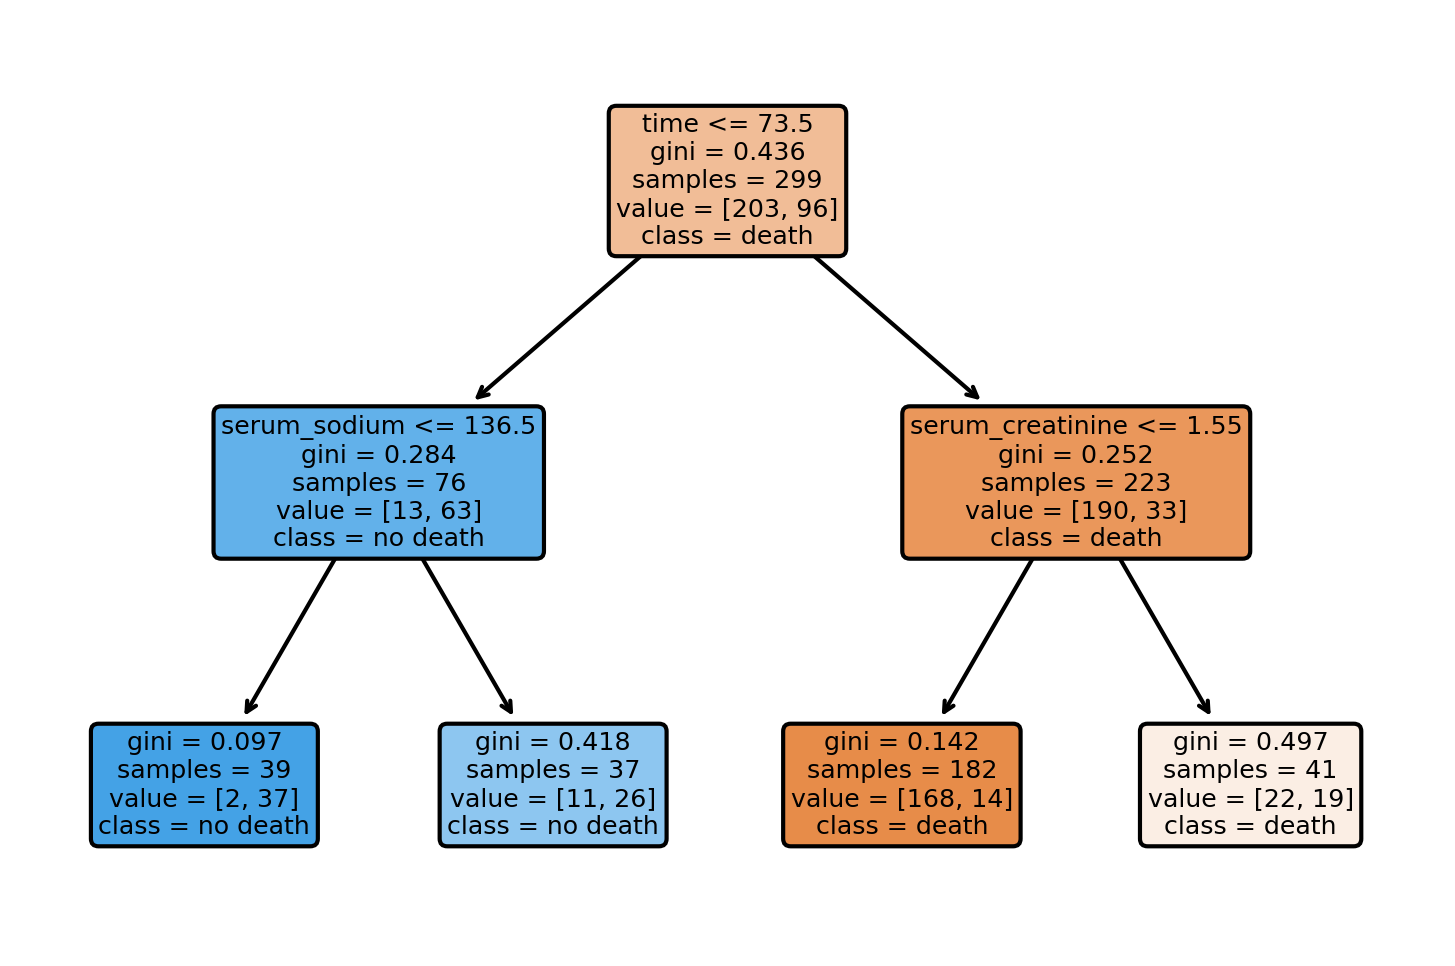

In [22]:
features = list(df.columns[:])

from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth = 2, random_state = 0)
clf = clf.fit(X, y)
fig, axes = plt.subplots(dpi = 300)
tree.plot_tree(clf, filled=True, rounded=True
               , feature_names=features
               , class_names=["death", "no death"])